# Latihan Data Exploration NLP
NLP adalah cabang dari Artificial Intelligence yang berhubungan dengan interaksi antara mesin dan manusia menggunakan bahasa natural.

Eksplorasi data merupakan langkah untuk memahami data sebelum dilakukan praproses. Pemahaman terhadap data yang akan di-mining dapat membantu dalam menentukan teknik-teknik pra-proses dan analisis data terhadap data sebelum dilakukan data mining.

##import library

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import data
silahkan gunakan data yang sudah kalian ambil pada hari selasa, data berupa text yang diambil di twitter dengan topik tertentu

atau bisa gunakan data yang disediakan
[disini](https://drive.google.com/file/d/10sIjKMFBhBlp5W4zCWFwXDars2c7koyR/view?usp=sharing)


In [ ]:
tweet = pd.read_csv('/content/bjorka.csv')
tweet

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-09-20 12:21:02,b'@wiragaksableng @iya_althaf Hahahaha.. Sdkit...,0,0,1572199152418975746,InginBebas6
1,2022-09-20 12:20:48,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572199092926943232,Daaan_Daaann
2,2022-09-20 12:20:18,b'RT @MMargani5: Akibat GONJANG-GANJING Kasus ...,0,463,1572198968284839938,Tju_Lee
3,2022-09-20 12:20:09,"b'RT @HalimTeuku: Kata Bjorka bong: ""Saya Hack...",0,2,1572198930104078339,6undul0h
4,2022-09-20 12:19:51,b'RT @rekomendasihitz: pastel outfit idea \xf0...,0,79,1572198853146968064,lonjwinkiyowoo
...,...,...,...,...,...,...
2639,2022-09-20 03:58:51,"b'RT @6undul0h: Sebentar..., bjorka itu khan h...",0,44,1572072773035626496,1Agamano
2640,2022-09-20 03:58:34,b'RT @MMargani5: Akibat GONJANG-GANJING Kasus ...,0,463,1572072700314808324,iqbalkidd
2641,2022-09-20 03:58:28,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572072678261149701,manadiy
2642,2022-09-20 03:58:11,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572072606496600064,adila_shatir


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tweets = tweet.iloc[0:300,:]
tweets

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-09-20 12:21:02,b'@wiragaksableng @iya_althaf Hahahaha.. Sdkit...,0,0,1572199152418975746,InginBebas6
1,2022-09-20 12:20:48,b'RT @ismailfahmi: Ndak gini juga cara mainnya...,0,1596,1572199092926943232,Daaan_Daaann
2,2022-09-20 12:20:18,b'RT @MMargani5: Akibat GONJANG-GANJING Kasus ...,0,463,1572198968284839938,Tju_Lee
3,2022-09-20 12:20:09,"b'RT @HalimTeuku: Kata Bjorka bong: ""Saya Hack...",0,2,1572198930104078339,6undul0h
4,2022-09-20 12:19:51,b'RT @rekomendasihitz: pastel outfit idea \xf0...,0,79,1572198853146968064,lonjwinkiyowoo
...,...,...,...,...,...,...
295,2022-09-20 11:20:57,b'@bjorkanismreal Real kah bjorka',0,0,1572184032909365249,friendly685
296,2022-09-20 11:20:00,"b'""Halo nyonya, saya tidak punya banyak waktu ...",2,0,1572183791098941440,okezonenews
297,2022-09-20 11:19:59,b'RT @rekomendasihitz: pastel outfit idea \xf0...,0,79,1572183787228004355,racunterusguis
298,2022-09-20 11:19:58,b'RT @tubbirfess: Polisi nyari bjorka 1 bulan ...,0,590,1572183784312930304,tweetaje_aje


##Fungsi Preprocessing
Text preprocessing adalah suatu proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi dengan melalui serangkaian tahapan yang meliputi tahapan case folding, tokenizing, filtering dan stemming. Tapi, sesungguhnya tidak ada aturan pasti tentang setiap tahapan dalam text preprocessing. Semua itu tergantung dengan jenis serta kondisi data yang kita miliki. Text preprocessing merupakan salah satu implementasi dari text mining. Text mining sendiri adalah suatu kegiatan menambang data, dimana data yang biasanya diambil berupa text yang bersumber dari dokumen-dokumen yang memiliki goals untuk mencari kata kunci yang mewakili dari sekumpulan dokumen tersebut sehingga nantinya dapat dilakukan analisa hubungan antara dokumen-dokumen tersebut.

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

##Download Punkt
Punkt dan stopword adalah corpus atau dataset yang disediakan oleh nltk yang akan banyak digunakan pada domain NLP

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Proses Preprocessing,
Tahap ini adalah menjalankan fungsi Preprocessing data kita

sebagai gambaran 4000 data sekitar 1.5 jam sabar ya

In [ ]:
tweets['text_clean'] = tweets['isitweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['isitweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

## Menampilkan kalimat yang sudah di preprocessing

In [ ]:
tweets

,timetweet,favcount,retwcount,id,name,text_clean,text_preprocessed
0,2022-09-20 12:21:02,0,0,1572199152418975746,InginBebas6,b althaf hahahaha sdkit pi lg ini sy ku pensiu...,"[b, althaf, hahahaha, sdkit, pi, lg, sy, ku, p..."
1,2022-09-20 12:20:48,0,1596,1572199092926943232,Daaan_Daaann,b ndak gini juga cara mainnya omnndi eropa di ...,"[b, ndak, gin, main, omnndi, eropa, singapore,..."
2,2022-09-20 12:20:18,0,463,1572198968284839938,Tju_Lee,b akibat gonjangganjing kasus sambo amp bjorka...,"[b, akibat, gonjangganjing, sambo, amp, bjorka..."
3,2022-09-20 12:20:09,0,2,1572198930104078339,6undul0h,b kata bjorka bong saya hacker mau beli akun t...,"[b, bjorka, bong, hacker, beli, akun, tele, nn..."
4,2022-09-20 12:19:51,0,79,1572198853146968064,lonjwinkiyowoo,b pastel outfit idea xfxfxcxnnxexxthreadnnadam...,"[b, pastel, outfit, idea, xfxfxcxnnxexxthreadn..."
...,...,...,...,...,...,...,...
290,2022-09-20 11:21:30,0,139,1572184171690487809,donrev670,b bjorka jumat berkah,"[b, bjorka, jumat, berkah]"
293,2022-09-20 11:21:20,0,0,1572184127692214273,Iqbaleee11_,bjkt hallo mimin abis ngumpul sama bjorka yak,"[bjkt, hallo, mimin, abis, ngumpul, bjorka, yak]"
294,2022-09-20 11:21:16,0,3,1572184110881472519,apriannoor4,b bagaimana uu pdp dalam memerangkap para pemb...,"[b, uu, pdp, perangkap, pembombol, data, priba..."
295,2022-09-20 11:20:57,0,0,1572184032909365249,friendly685,b real kah bjorka,"[b, real, kah, bjorka]"


## Labeling dengan lexicon
Pelabelan data adalah proses penambahan label ke data mentah untuk memberikan konteks atau makna pada data. Data berlabel kemudian digunakan untuk melatih model NLP untuk membuat prediksi atau memahami atau menghasilkan ucapan.

pelabelan kali ini menggunakan lexicon sebagai pelabelan secara otomatis. Dalam klasifikasi berbasis leksikon, dokumen diberi label dengan membandingkan jumlah kata yang muncul dari dua leksikon yang berlawanan, seperti sentimen positif dan negatif.

Sebelum menjalankan kode berikut silahkan download 2 file pendukung berikut:

[Negatif](https://drive.google.com/file/d/1UBLrxmfFTEg1t9rHw6v-M5pJVRDWuyFH/view?usp=sharing)

[Positif](https://drive.google.com/file/d/1JqpJ12JqiOMOJ5R0Gg4rz3Xbqe3j2-Om/view?usp=sharing)

[Referensi](https://github.com/fajri91/InSet)

In [ ]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file


negative    66
positive    39
neutral     14
Name: polarity, dtype: int64


## Visualisasi Hasil sentiment

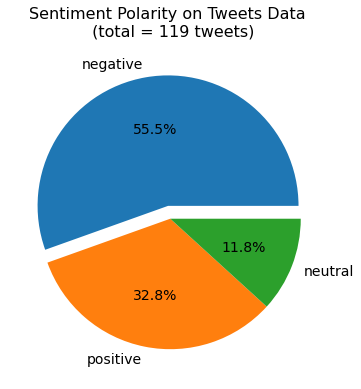

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title(f'Sentiment Polarity on Tweets Data \n (total = {len(tweets.index)} tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,b program studi ilmu hubungan internasional dan fakultas ilmu sosial dan politik unikom menerima kunjungan commissioner civil service commission timor leste nnselengkapnya,15,positive
2,bhelpdesk ini bisa dibilang sangat responsif dalam menanggapi support ticket yg kita buat paling responsif dari semua web app milik instansi pemerintah yang pernah saya gunakan sebelumnya dari sisi ini setidaknya kita lihat hasil kerja shadow team mas menteri,14,positive
3,brapat pleno mdgb ptnbh kaji pendanaan perguruan tinggi dan dana abadi ptnbhnnbaca berita selengkapnya di laman nn,14,positive
4,bdr dhaniswara k harjono sebagai rektor uki turut bangga atas keberhasilan prof chontina meraih gelar profesorguru besar dalam bidang ilmu komunikasi nnbaca selengkapnya di,11,positive
5,bketua badan wakaf indonesia mohammad nuh mengapresiasi langkah yg menyertakan dana abadi dlm skema sukuk wakaf pivate placementn,11,positive
6,bipb university merupakan kampus kedua dan terbesar yang menginvestasikan dana abadinya melalui sukuk wakafnn,10,positive
7,bselamat hati batik nasionaln oktober nnterima kasih kepada semua yang punya andil dalam pelestarian batiknn,9,positive
8,bngomong ke diri sendiri kuliahnya diseriusin yah dan tolong kali ini lulus tepat waktu jangan ngecewain orang yang sudah support kmu,9,positive
9,bhalo sobat kuliah karyawan xfxfxxngimana nih sobat kuliah karyawan rasanya hari pertama kuliahnncoba spill dikolom komentar ya dan tag temanmunn,8,positive
10,brapat pleno mdgb ptnbh bahas pendanaan perguruan tinggi dan keberadaan pusat pendidikan di iknnnbaca berita selengkapnya di laman nn,8,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:20]

,text_clean,polarity_score,polarity
1,btito priya prayoga dan raga kurniando yang tergabung dalam vokal grup twelve strong mendapat juara nnsemoga informasi ini mendorong fikomers untuk terus maju mengukir prestasinnnnnnn,-15,negative
2,blele bukan sembarang lele ini lele ipbckuat yang tahan dari serangan penyakit xfxfxxenn,-14,negative
3,bselamat pagi pak izin bertanya ttg sisa honor mentor program msib batch yg selesai januari knp blm dibayarkan pak dimana kendalanya cc ri ri ri,-14,negative
4,bkarsa loka volume tantangan standardisasi cangkul produksi ikm lokalnnbaca berita selengkapnya di laman nn,-11,negative
5,bdiskusi pentingnya tata kelola ruang atasi energy trilemma indonesiannbaca berita selengkapnya di laman nn,-11,negative
6,bcerita bisma toriq mahasiswa teknik geologi itb yang menang kompetisi videonnbaca berita selengkapnya di laman nn,-10,negative
7,bitb resmikan unit usaha komersial baru pt itb pressnnbaca berita selengkapnya di laman nn,-10,negative
8,bturut berduka cita untuk tragedi sepak bola indonesia yang terjadi di stadion kanjuruhan malangxfxfxx n,-9,negative
9,bdosen seni rupa itb tisna sanjaya diundang pameran di galeri seni nasional thailandnnbaca berita selengkapnya di laman nn,-9,negative
10,brogue signal prototipe aplikasi anti kriminalitas hasil karya mahasiswa teknik industri itbnnbaca berita selengkapnya di laman nn,-9,negative


##Visualize word cloud
Word cloud merupakan salah satu metode untuk menampilkan data teks secara visual. Grafik ini populer dalam text mining karena mudah dipahami.

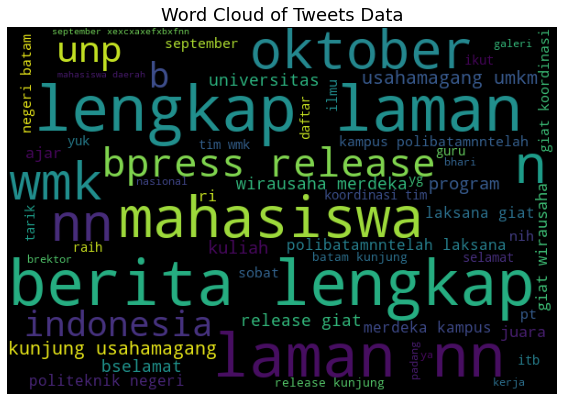

In [ ]:
# Visualize word cloud

list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

#Tugas
Silahkan kalian labeling data yang akan gunakan sebagai mini project!

kemudian simpan hasilnya dalam csv!

# Labeling dengan lexicon

In [ ]:
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tweet = pd.read_csv('Shopeepay.csv')
tweet

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-10-05 10:20:16,b'Seruu banget kann!! udah siap banget jadi Tr...,0,0,1577604576680693761,travelxism
1,2022-10-05 09:41:28,b'Komisaris PT PGN Arcandra Tahar Kuliah Umum ...,0,0,1577594811543977985,HumasUnp
2,2022-10-05 09:03:52,b'Rektor dan Sivitas Akademika Universitas Neg...,0,0,1577585351522103296,HumasUnp
3,2022-10-05 08:41:21,b'[PRESS RELEASE KEGIATAN WIRAUSAHA MERDEKA KA...,0,0,1577579683725840384,wmk_polibatam
4,2022-10-05 08:40:40,b'[PRESS RELEASE KEGIATAN WIRAUSAHA MERDEKA KA...,0,0,1577579513869111296,wmk_polibatam
...,...,...,...,...,...,...
254,2022-09-27 14:25:00,b'Ada yang pernah ikut magang dari kampus merd...,0,0,1574767064841326592,bucinajun
255,2022-09-27 14:19:14,b'@collegemenfess Mau nunggu sampe berapa bany...,1,0,1574765612920078337,anonymyee
256,2022-09-27 13:38:47,b'@collegemenfess @KampusMerdeka @nadiemmakari...,0,0,1574755432476078080,zeusclassical
257,2022-09-27 11:27:33,"b'RT @ipbofficial: #IPBTips\nUntukmu, si palin...",0,2,1574722406375034881,Gaaaaa44


In [ ]:
tweets = tweet.iloc[0:300,:]
tweets

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-10-05 10:20:16,b'Seruu banget kann!! udah siap banget jadi Tr...,0,0,1577604576680693761,travelxism
1,2022-10-05 09:41:28,b'Komisaris PT PGN Arcandra Tahar Kuliah Umum ...,0,0,1577594811543977985,HumasUnp
2,2022-10-05 09:03:52,b'Rektor dan Sivitas Akademika Universitas Neg...,0,0,1577585351522103296,HumasUnp
3,2022-10-05 08:41:21,b'[PRESS RELEASE KEGIATAN WIRAUSAHA MERDEKA KA...,0,0,1577579683725840384,wmk_polibatam
4,2022-10-05 08:40:40,b'[PRESS RELEASE KEGIATAN WIRAUSAHA MERDEKA KA...,0,0,1577579513869111296,wmk_polibatam
...,...,...,...,...,...,...
254,2022-09-27 14:25:00,b'Ada yang pernah ikut magang dari kampus merd...,0,0,1574767064841326592,bucinajun
255,2022-09-27 14:19:14,b'@collegemenfess Mau nunggu sampe berapa bany...,1,0,1574765612920078337,anonymyee
256,2022-09-27 13:38:47,b'@collegemenfess @KampusMerdeka @nadiemmakari...,0,0,1574755432476078080,zeusclassical
257,2022-09-27 11:27:33,"b'RT @ipbofficial: #IPBTips\nUntukmu, si palin...",0,2,1574722406375034881,Gaaaaa44


In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tweets['text_clean'] = tweets['isitweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['isitweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)



In [ ]:
tweets

,timetweet,favcount,retwcount,id,name,text_clean,text_preprocessed
0,2022-10-05 10:20:16,0,0,1577604576680693761,travelxism,bseruu banget kann udah siap banget jadi trave...,"[bseruu, banget, kann, udah, banget, travelxis..."
1,2022-10-05 09:41:28,0,0,1577594811543977985,HumasUnp,bkomisaris pt pgn arcandra tahar kuliah umum d...,"[bkomisaris, pt, pgn, arcandra, tahar, kuliah,..."
2,2022-10-05 09:03:52,0,0,1577585351522103296,HumasUnp,brektor dan sivitas akademika universitas nege...,"[brektor, sivitas, akademika, universitas, neg..."
3,2022-10-05 08:41:21,0,0,1577579683725840384,wmk_polibatam,bpress release kegiatan wirausaha merdeka kamp...,"[bpress, release, giat, wirausaha, merdeka, ka..."
5,2022-10-05 08:20:27,4,0,1577574426786246656,itbofficial,bcerita bisma toriq mahasiswa teknik geologi i...,"[bcerita, bisma, toriq, mahasiswa, teknik, geo..."
...,...,...,...,...,...,...,...
124,2022-09-27 14:25:00,0,0,1574767064841326592,bucinajun,bada yang pernah ikut magang dari kampus merde...,"[bada, magang, kampus, merdeka, gak, butuh, info]"
125,2022-09-27 14:19:14,1,0,1574765612920078337,anonymyee,b mau nunggu sampe berapa banyak lagi teman ka...,"[b, nunggu, sampe, teman, tumbang, pakxfxfxxad..."
126,2022-09-27 13:38:47,0,0,1574755432476078080,zeusclassical,b mohon maaf pak ini yang namanya merdeka,"[b, mohon, maaf, nama, merdeka]"
127,2022-09-27 11:27:33,0,2,1574722406375034881,Gaaaaa44,b nuntukmu si paling khawatir akan masa depann...,"[b, nuntukmu, si, khawatir, depannyuk, sudah, ..."


In [ ]:
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())


negative    66
positive    39
neutral     14
Name: polarity, dtype: int64


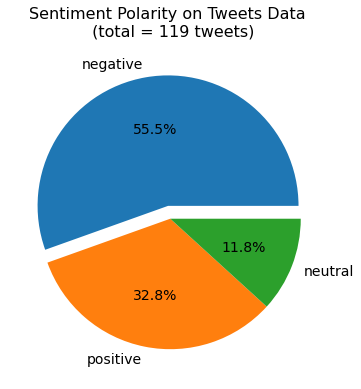

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title(f'Sentiment Polarity on Tweets Data \n (total = {len(tweets.index)} tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'neutral']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,bpress release kunjungan usahamagang umkm wmk polibatamnnselasa oktober politeknik negeri batam telah melakukan kunjungan usahamagang umkm ke pt mes teknologi indonesiaxexcxaxefxbxfnn,0,neutral
2,bdirgahayu tni ke tahun ntni adalah kitannnnnnnn,0,neutral
3,bmemperingati dies natalis ke untirta punya deretan agenda menarik mulai dari lokakarya nasional hingga pemilihan duta kampusnyuk intip jadwal lengkapnyann nnn n,0,neutral
4,bpress release kunjungan usahamagang umkm wmk polibatamnnminggu september politeknik negeri batam telah melakukan kunjungan usahamagang umkm ke pobosoccerxexcxan,0,neutral
5,bpress release kunjungan usahamagang umkm wmk polibatamnnjumat september politeknik negeri batam telah melakukan kunjungan usahamagang umkm ke galeri kreatifxexcxaxefxbxfnn,0,neutral
6,bmanglxcxa pintonan layar sauh nyurahan kahirupan masyarakat basisir nn xcxann,0,neutral
7,bmusik dua sarasa nnmusik nn,0,neutral
8,bstand unp warnai umkm sumbar malagak,0,neutral
9,bselamat hari kesaktian pancasila oktober nnnn,0,neutral
10,bhari kesaktian pancasilan n nn n nn,0,neutral


In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,b program studi ilmu hubungan internasional dan fakultas ilmu sosial dan politik unikom menerima kunjungan commissioner civil service commission timor leste nnselengkapnya,15,positive
2,bhelpdesk ini bisa dibilang sangat responsif dalam menanggapi support ticket yg kita buat paling responsif dari semua web app milik instansi pemerintah yang pernah saya gunakan sebelumnya dari sisi ini setidaknya kita lihat hasil kerja shadow team mas menteri,14,positive
3,brapat pleno mdgb ptnbh kaji pendanaan perguruan tinggi dan dana abadi ptnbhnnbaca berita selengkapnya di laman nn,14,positive
4,bdr dhaniswara k harjono sebagai rektor uki turut bangga atas keberhasilan prof chontina meraih gelar profesorguru besar dalam bidang ilmu komunikasi nnbaca selengkapnya di,11,positive
5,bketua badan wakaf indonesia mohammad nuh mengapresiasi langkah yg menyertakan dana abadi dlm skema sukuk wakaf pivate placementn,11,positive
6,bipb university merupakan kampus kedua dan terbesar yang menginvestasikan dana abadinya melalui sukuk wakafnn,10,positive
7,bselamat hati batik nasionaln oktober nnterima kasih kepada semua yang punya andil dalam pelestarian batiknn,9,positive
8,bngomong ke diri sendiri kuliahnya diseriusin yah dan tolong kali ini lulus tepat waktu jangan ngecewain orang yang sudah support kmu,9,positive
9,bhalo sobat kuliah karyawan xfxfxxngimana nih sobat kuliah karyawan rasanya hari pertama kuliahnncoba spill dikolom komentar ya dan tag temanmunn,8,positive
10,brapat pleno mdgb ptnbh bahas pendanaan perguruan tinggi dan keberadaan pusat pendidikan di iknnnbaca berita selengkapnya di laman nn,8,positive
